In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


from src.optimisation import optimize_charging_schedule
from src.scaling import scale_solar, scale_consumption, SCALING_FACTOR_CONSUMPTION

In [2]:
#capacity = [14,28,42] # we can later iterate through different capacities
# ChatGPT: The Tesla Powerwall has a round-trip efficiency of approximately 90%.
charging_efficiency = 0.95  # Charging efficiency
discharging_efficiency = 0.95  # Discharging efficiency
solar_installed_capacity = 5 #kW
capacity = 14  # Battery capacity Tesla Powerwall
charging_power = 5
discharging_power = 5

In [3]:
df = pd.read_pickle('data/predictions_full.pkl')

In [4]:
df2 = pd.read_pickle('data/final_dataframe.pkl')

In [5]:
df2 = df2.drop(columns=['Photovoltaics [MWh] Original resolutions','Photovoltaics [MW] Calculated resolutions','normalisation_factor'])

In [6]:
df2 = df2.set_index(df2.Date)

In [7]:
df = df.set_index(df.Prediction_date)

In [8]:
df = df.join(df2,how='inner')

In [9]:
df = df.drop(columns='Date')

In [10]:
df = df.rename(mapper={'Total (grid load) [MWh] Original resolutions':'consumption_now','Germany/Luxembourg [€/MWh] Calculated resolutions':'price_now','Solar_generation_MWh_normalized':'solar_now'},axis=1)

In [11]:
scale_consumption(df,'consumption_output',SCALING_FACTOR_CONSUMPTION)
scale_consumption(df,'consumption_true',SCALING_FACTOR_CONSUMPTION)
scale_consumption(df,'consumption_now',SCALING_FACTOR_CONSUMPTION)

In [12]:
scale_solar(df,'solar_output',solar_installed_capacity)
scale_solar(df,'solar_true',solar_installed_capacity)
scale_solar(df,'solar_now',solar_installed_capacity)

In [13]:
#scale price to euro per kWh
df['price_true'] = df['price_true'] / 1000
df['price_now'] = df['price_now'] / 1000

In [14]:
df['demand_after_solar_pred'] = df['consumption_output'] - df['solar_output']
df['demand_after_solar_true'] = df['consumption_true'] - df['solar_true']
df['demand_after_solar_now'] = df['consumption_now'] - df['solar_now']

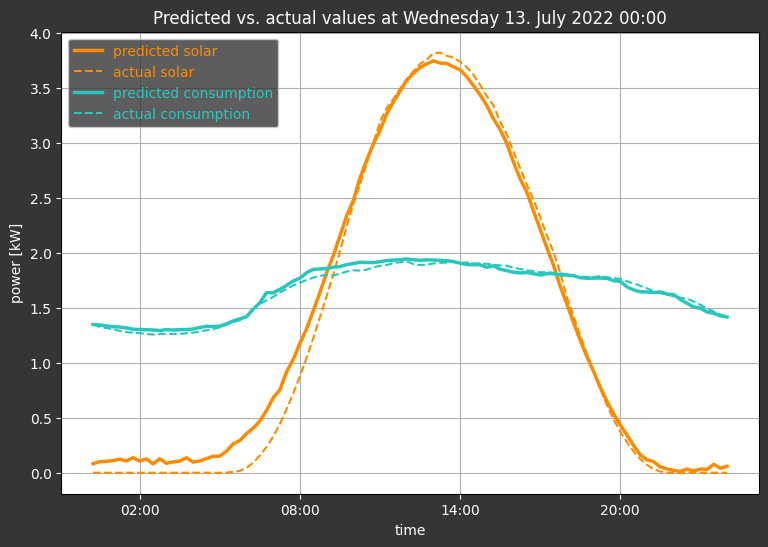

In [15]:
time = 3361 #10000

fig = plt.figure(facecolor='#353535',figsize=(9,6))
hours = mdates.HourLocator(interval = 6)
h_fmt = mdates.DateFormatter('%H:%M')
ax = plt.axes(facecolor='white')
#ax.set_frame_on(False)
ax.set_title(f'Predicted vs. actual values at {df.Prediction_date.iloc[time].strftime("%A %d. %B %Y %H:%M")}')
ax.grid(True)
ax.tick_params(colors='white')  # Set the x-axis tick labels color to white
solar_out = ax.plot(df.output_Timestamp.iloc[time],df.solar_output.iloc[time],c='#fb8c00',linewidth=2.5)
solar_true = ax.plot(df.output_Timestamp.iloc[time],df.solar_true.iloc[time],linestyle='--',c='#fb8c00')
consumption_out = ax.plot(df.output_Timestamp.iloc[time],df.consumption_output.iloc[time],c='#27c7bd',linewidth=2.5)
consumption_true = ax.plot(df.output_Timestamp.iloc[time],df.consumption_true.iloc[time],linestyle='--',c='#27c7bd')
#demand_after_solar_out = ax.plot(df.output_Timestamp.iloc[time],df.demand_after_solar_pred.iloc[time],c='#000000',linewidth=2.5)
#demand_after_solar_true = ax.plot(df.output_Timestamp.iloc[time],df.demand_after_solar_true.iloc[time],linestyle='--',c='#000000')
#charging_out = ax.plot(df.output_Timestamp.iloc[time],df.charging_forecast.iloc[time],c='red',linewidth=2.5)
#discharging_out = ax.plot(df.output_Timestamp.iloc[time],df.discharging_forecast.iloc[time],linestyle='-',c='green',linewidth=2.5)
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')
ax.set_xlabel('time')
ax.set_ylabel('power [kW]')
#prediction_discharge = plt.plot(df.output_Timestamp.iloc[time],df.discharging_forecast.iloc[time],c='#27c7bd')
#prediction_charge = plt.plot(df.output_Timestamp.iloc[time],df.charging_forecast.iloc[time],linestyle='-',c='#27c7bd')
legend = plt.legend((solar_out[0],solar_true[0],consumption_out[0],consumption_true[0]),('predicted solar','actual solar','predicted consumption','actual consumption'),labelcolor='linecolor',loc='upper left')
legend.get_frame().set_facecolor('#353535')



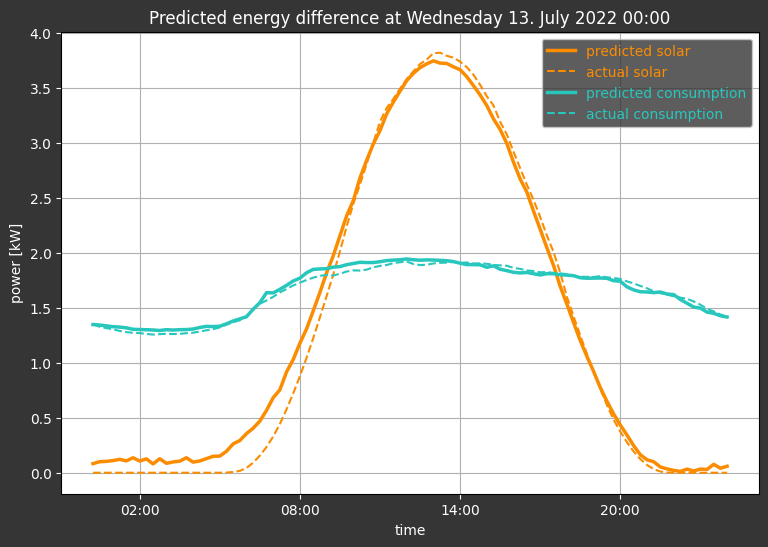

In [16]:
time =  3361 #10000

fig = plt.figure(facecolor='#353535',figsize=(9,6))
hours = mdates.HourLocator(interval = 6)
h_fmt = mdates.DateFormatter('%H:%M')
ax = plt.axes(facecolor='white')
#ax.set_frame_on(False)
ax.grid(True)
ax.tick_params(colors='white')  # Set the x-axis tick labels color to white
ax.set_title(f'Predicted energy difference at {df.Prediction_date.iloc[time].strftime("%A %d. %B %Y %H:%M")}')
solar_out = ax.plot(df.output_Timestamp.iloc[time],df.solar_output.iloc[time],c='#fb8c00',linewidth=2.5)
solar_true = ax.plot(df.output_Timestamp.iloc[time],df.solar_true.iloc[time],linestyle='--',c='#fb8c00')
consumption_out = ax.plot(df.output_Timestamp.iloc[time],df.consumption_output.iloc[time],c='#27c7bd',linewidth=2.5)
consumption_true = ax.plot(df.output_Timestamp.iloc[time],df.consumption_true.iloc[time],linestyle='--',c='#27c7bd')
#demand_after_solar_out = ax.plot(df.output_Timestamp.iloc[time],df.demand_after_solar_pred.iloc[time],c='#000000',linewidth=2.5)
#demand_after_solar_true = ax.plot(df.output_Timestamp.iloc[time],df.demand_after_solar_true.iloc[time],linestyle='--',c='#000000')
#charging_out = ax.plot(df.output_Timestamp.iloc[time],df.charging_forecast.iloc[time],c='red',linewidth=2.5)
#discharging_out = ax.plot(df.output_Timestamp.iloc[time],df.discharging_forecast.iloc[time],linestyle='-',c='green',linewidth=2.5)
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

ax.set_xlabel('time')
ax.set_ylabel('power [kW]')
#prediction_dsicharge = plt.plot(df.output_Timestamp.iloc[time],df..iloc[time],c='#27c7bd')
#prediction_charge = plt.plot(df.output_Timestamp.iloc[time],df.consumption_true.iloc[time],linestyle='--',c='#27c7bd')
legend = plt.legend((solar_out[0],solar_true[0],consumption_out[0],consumption_true[0]),('predicted solar','actual solar','predicted consumption','actual consumption'),labelcolor='linecolor',loc='upper right')
legend.get_frame().set_facecolor('#353535')



In [17]:
def restrict_to_greater_than_zero(value):
    if value >= 0:
        result = value
    else:
        result = 0
    return result

In [18]:
def restrict_to_zero_to_one(value):
    if 1 >= value >= 0:
        result = value
    elif value < 0:
        result = 0
    else:
        result = 1
    return result

In [19]:
s = 0
optimal_charge_action = []
optimal_buy_action = []
optimal_sell_action = []
optimal_charge_forecast = []
optimal_sell_forecast = []
optimal_buy_forecast = []
status_list = []
objective_list = []
soc_forecast = []
soc0_list = []
soc1_list = []
soc_list = []
for t in range(len(df)):
    optimal_charge, optimal_buy, optimal_sell, optimal_soc, objective, status = optimize_charging_schedule(price=df['price_true'].iloc[t], demand_after_solar=df['demand_after_solar_pred'].iloc[t],
                                                            state_of_charge=s, capacity=capacity,
                                                            charging_efficiency= charging_efficiency,
                                                            discharging_efficiency=discharging_efficiency,
                                                            charging_power=charging_power, discharging_power=discharging_power
                                                            )
    optimal_charge_action.append(optimal_charge[0])
    optimal_buy_action.append(optimal_buy[0])
    optimal_sell_action_constrained = min(optimal_sell[0], restrict_to_greater_than_zero(df.iloc[t].loc['demand_after_solar_now'])) #this is an important part in our control algorithm. We would have to make sure not to discharge more due to wrong predictions than what can ACTUALLY be consumed
    optimal_sell_action.append(optimal_sell_action_constrained)
    optimal_charge_forecast.append(optimal_charge)
    optimal_sell_forecast.append(optimal_sell)
    optimal_buy_forecast.append(optimal_buy)
    status_list.append(status)
    objective_list.append(objective)
    soc_forecast.append(optimal_soc)
    soc0_list.append(optimal_soc[0])
    soc1_list.append(optimal_soc[1])

    s = restrict_to_zero_to_one(s + (charging_efficiency * optimal_charge[0] - (1 / discharging_efficiency) * optimal_sell_action_constrained) / 4 / capacity)
    soc_list.append(s)

    if t % 1000 == 0:
        print(str(t)+'/'+str(len(df)))
    

0/34376
1000/34376
2000/34376
3000/34376
4000/34376
5000/34376
6000/34376
7000/34376
8000/34376
9000/34376
10000/34376
11000/34376
12000/34376
13000/34376
14000/34376
15000/34376
16000/34376
17000/34376
18000/34376
19000/34376
20000/34376
21000/34376
22000/34376
23000/34376
24000/34376
25000/34376
26000/34376
27000/34376
28000/34376
29000/34376
30000/34376
31000/34376
32000/34376
33000/34376
34000/34376


In [20]:
df['optimal_charging_action'] = optimal_charge_action
df['optimal_discharging_action'] = optimal_sell_action
df['optimal_buy_action'] = optimal_buy_action
df['soc0'] = soc0_list
df['soc1'] = soc1_list
df['soc'] = soc_list
df['objective_function'] = objective_list
df['status'] = status_list
df['charging_forecast'] = optimal_charge_forecast
df['discharging_forecast'] = optimal_sell_forecast
df['buying_forecast'] = optimal_buy_forecast
df['soc_forecast'] = soc_forecast

In [22]:
df = pd.read_pickle('data/optimisation_constrained')

In [21]:
df['demand_with_battery'] = df['demand_after_solar_now'] + df['optimal_charging_action'] - df['optimal_discharging_action']

In [22]:
df['energy_cost_with_battery'] = df['demand_with_battery'] * df['price_now']

In [23]:
df['demand_after_solar_mask'] = (df['demand_after_solar_now'] > 0).astype(int)

In [24]:
df['energy_cost_without_battery'] = df['demand_after_solar_mask'] * df['demand_after_solar_now'] * df['price_now']

In [25]:
df['cumulated_savings'] = df['energy_cost_without_battery'].cumsum() - df['energy_cost_with_battery'].cumsum()

In [26]:
df.to_pickle('data/optimisation_constrained_5kW_solar.pkl')

<Axes: xlabel='Prediction_date'>

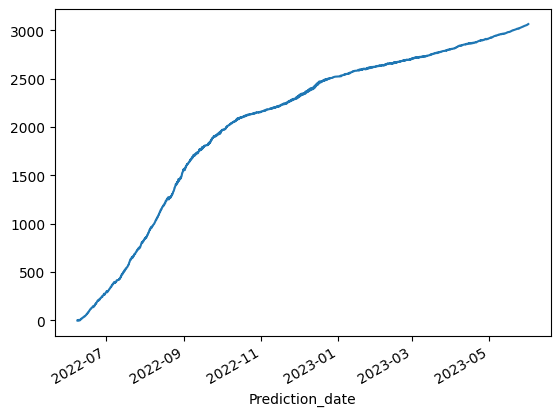

In [27]:
df.cumulated_savings.plot()

In [53]:
print(df['energy_cost_with_battery'].sum())
print(df['energy_cost_without_battery'].sum())
print(1 - df['energy_cost_with_battery'].sum()/df['energy_cost_without_battery'].sum())
savings = -df['energy_cost_with_battery'].sum() + df['energy_cost_without_battery'].sum()
print(savings)
print(11500/savings)

4513.64118151093
7579.360319510747
0.4044825696052554
3065.7191379998167
3.751159020882456


In [54]:
11500/savings

3.751159020882456

In [55]:
11500/2437.2567430131103

4.718419605553283

In [52]:
0.4044825696052554/0.3216171429357336

1.257652393504659

In [110]:
print(df['energy_cost_with_battery'].sum())
print(df['energy_cost_without_battery'].sum())
print(1 - df['energy_cost_with_battery'].sum()/df['energy_cost_without_battery'].sum())
savings = -df['energy_cost_with_battery'].sum() + df['energy_cost_without_battery'].sum()
print(savings)
print(11500/savings)

6250.029776657275
8413.762542718765
0.2571658939833018
2163.73276606149
5.314889241582612


In [32]:
np.unique(df.Prediction_date.duplicated(), return_counts=True)

(array([False,  True]), array([34364,    12]))

In [33]:
df_no_duplicates = df[~df.Prediction_date.duplicated()].copy()

In [41]:
df.iloc[1].loc['Prediction_date']

Timestamp('2022-06-08 00:00:00')

In [34]:
soc = 0
soc_mean_list = []
charging_list = []
discharging_list = []
charging = 0
discharging = 0
for t in df_no_duplicates['Prediction_date']:
    mean_price = (df_no_duplicates.loc[t,'price_true']).mean()
    if df_no_duplicates.loc[t,'price_now'] < mean_price: #->buying
        if (1 - soc) > (charging_power * charging_efficiency / (capacity * 4)):
            charging = charging_power
            discharging = 0
        else:
            charging = (1-soc)/(charging_power * charging_efficiency / (capacity * 4)) * charging_power
            discharging = 0
    else: #->selling
        if soc > discharging_power * (1/discharging_efficiency) / (capacity * 4):
            discharging = min(discharging_power, df_no_duplicates.loc[t,'demand_after_solar_now'])
            charging = 0
        else:
            discharging = min(df_no_duplicates.loc[t,'demand_after_solar_now'],soc /(discharging_power * (1/discharging_efficiency) / (capacity * 4)) * (discharging_power))
            charging = 0
    
    soc_mean_list.append(soc)
    soc = soc + charging * charging_efficiency / (4 * capacity) - discharging * (1/discharging_efficiency) / (4 * capacity)
    charging_list.append(charging)
    discharging_list.append(discharging)
                                                                        

In [35]:
df_no_duplicates['simple_charge'] = charging_list
df_no_duplicates['simple_discharge'] = discharging_list

In [36]:
df_no_duplicates['demand_after_simple_algorithm'] = df_no_duplicates['demand_after_solar_now'] + df_no_duplicates['simple_charge'] - df_no_duplicates['simple_discharge']

In [37]:
df_no_duplicates['energy_cost_with_simple_algorithm'] = df_no_duplicates['demand_after_simple_algorithm'] * df_no_duplicates['price_now']

In [38]:
print(df_no_duplicates['energy_cost_with_battery'].sum())
print(df_no_duplicates['energy_cost_without_battery'].sum())
print(df_no_duplicates['energy_cost_with_simple_algorithm'].sum())

print(1 - df_no_duplicates['energy_cost_with_simple_algorithm'].sum()/df_no_duplicates['energy_cost_without_battery'].sum())
savings = -df_no_duplicates['energy_cost_with_simple_algorithm'].sum() + df_no_duplicates['energy_cost_without_battery'].sum()
print(savings)
print(11500/savings)

4512.411557291291
7578.130695291107
5140.873952277997
0.3216171429357336
2437.2567430131103
4.718419605553283


In [159]:
df_no_duplicates.to_pickle('data/df_no_duplicates.pkl')

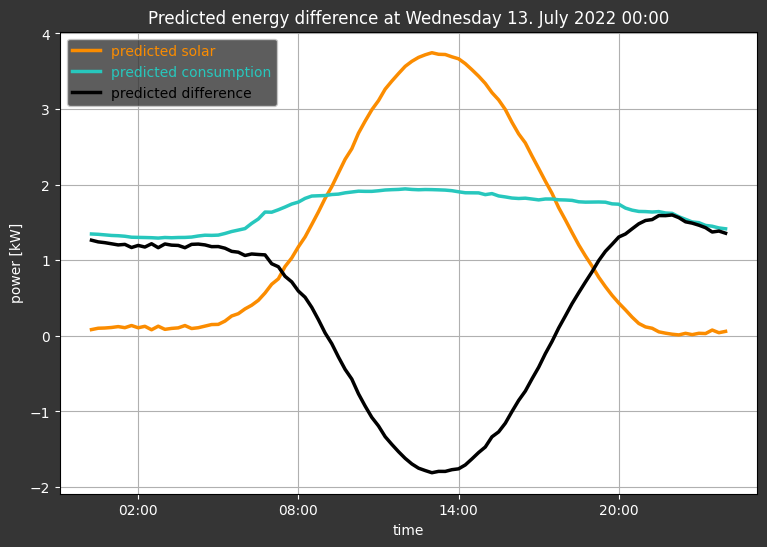

In [56]:
time = 3361 #10000

fig = plt.figure(facecolor='#353535',figsize=(9,6))
hours = mdates.HourLocator(interval = 6)
h_fmt = mdates.DateFormatter('%H:%M')
ax = plt.axes(facecolor='white')
#ax.set_frame_on(False)
ax.set_title(f'Predicted energy difference at {df.Prediction_date.iloc[time].strftime("%A %d. %B %Y %H:%M")}')
ax.grid(True)
ax.tick_params(colors='white')  # Set the x-axis tick labels color to white
solar_out = ax.plot(df.output_Timestamp.iloc[time],df.solar_output.iloc[time],c='#fb8c00',linewidth=2.5)
#solar_true = ax.plot(df.output_Timestamp.iloc[time],df.solar_true.iloc[time],linestyle='--',c='#fb8c00')
consumption_out = ax.plot(df.output_Timestamp.iloc[time],df.consumption_output.iloc[time],c='#27c7bd',linewidth=2.5)
#consumption_true = ax.plot(df.output_Timestamp.iloc[time],df.consumption_true.iloc[time],linestyle='--',c='#27c7bd')
demand_after_solar_out = ax.plot(df.output_Timestamp.iloc[time],df.demand_after_solar_pred.iloc[time],c='#000000',linewidth=2.5)
#demand_after_solar_true = ax.plot(df.output_Timestamp.iloc[time],df.demand_after_solar_true.iloc[time],linestyle='--',c='#000000')
#charging_out = ax.plot(df.output_Timestamp.iloc[time],df.charging_forecast.iloc[time],c='red',linewidth=2.5)
#discharging_out = ax.plot(df.output_Timestamp.iloc[time],df.discharging_forecast.iloc[time],linestyle='-',c='green',linewidth=2.5)
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')
ax.set_xlabel('time')
ax.set_ylabel('power [kW]')
#prediction_discharge = plt.plot(df.output_Timestamp.iloc[time],df.discharging_forecast.iloc[time],c='#27c7bd')
#prediction_charge = plt.plot(df.output_Timestamp.iloc[time],df.charging_forecast.iloc[time],linestyle='-',c='#27c7bd')
legend = plt.legend((solar_out[0],consumption_out[0],demand_after_solar_out[0]),('predicted solar','predicted consumption','predicted difference'),labelcolor='linecolor',loc='upper left')
legend.get_frame().set_facecolor('#353535')



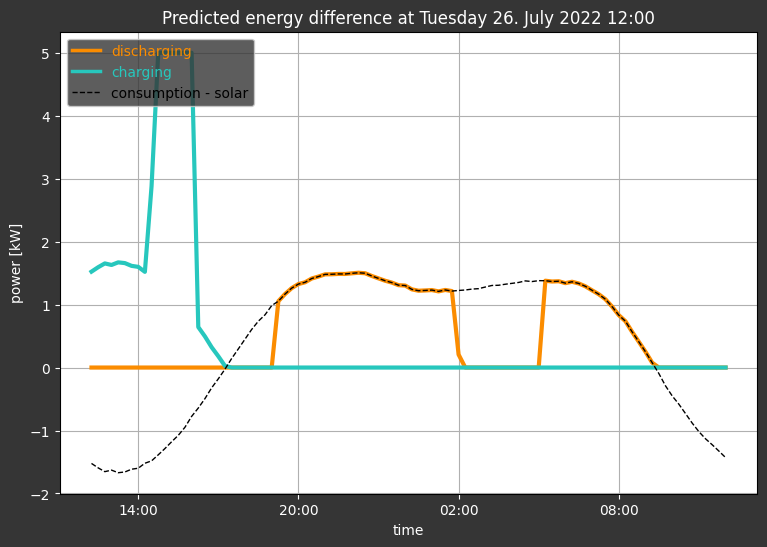

In [31]:
time = 4577+20*4 #3361 #10000

fig = plt.figure(facecolor='#353535',figsize=(9,6))
hours = mdates.HourLocator(interval = 6)
h_fmt = mdates.DateFormatter('%H:%M')
ax = plt.axes(facecolor='white')
#ax.set_frame_on(False)
ax.set_title(f'Predicted energy difference at {df.Prediction_date.iloc[time].strftime("%A %d. %B %Y %H:%M")}')
ax.grid(True)
ax.tick_params(colors='white')  # Set the x-axis tick labels color to white
#solar_out = ax.plot(df.output_Timestamp.iloc[time],df.solar_output.iloc[time],c='#fb8c00',linewidth=2.5)
#solar_true = ax.plot(df.output_Timestamp.iloc[time],df.solar_true.iloc[time],linestyle='--',c='#fb8c00')
#consumption_out = ax.plot(df.output_Timestamp.iloc[time],df.consumption_output.iloc[time],c='#27c7bd',linewidth=2.5)
#consumption_true = ax.plot(df.output_Timestamp.iloc[time],df.consumption_true.iloc[time],linestyle='--',c='#27c7bd')
#demand_after_solar_true = ax.plot(df.output_Timestamp.iloc[time],df.demand_after_solar_true.iloc[time],linestyle='--',c='#000000')
#charging_out = ax.plot(df.output_Timestamp.iloc[time],df.charging_forecast.iloc[time],c='red',linewidth=2.5)
#discharging_out = ax.plot(df.output_Timestamp.iloc[time],df.discharging_forecast.iloc[time],linestyle='-',c='green',linewidth=2.5)
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')
ax.set_xlabel('time')
ax.set_ylabel('power [kW]')
prediction_discharge = plt.plot(df.output_Timestamp.iloc[time],df.discharging_forecast.iloc[time],c='#fb8c00',linewidth=3)
prediction_charge = plt.plot(df.output_Timestamp.iloc[time],df.charging_forecast.iloc[time],linestyle='-',c='#27c7bd',linewidth=3)
demand_after_solar_out = ax.plot(df.output_Timestamp.iloc[time],df.demand_after_solar_pred.iloc[time],c='#000000',linewidth=1,linestyle='--')
legend = plt.legend((solar_out[0],consumption_out[0],demand_after_solar_out[0]),('discharging','charging','consumption - solar'),labelcolor='linecolor',loc='upper left')
legend.get_frame().set_facecolor('#353535')



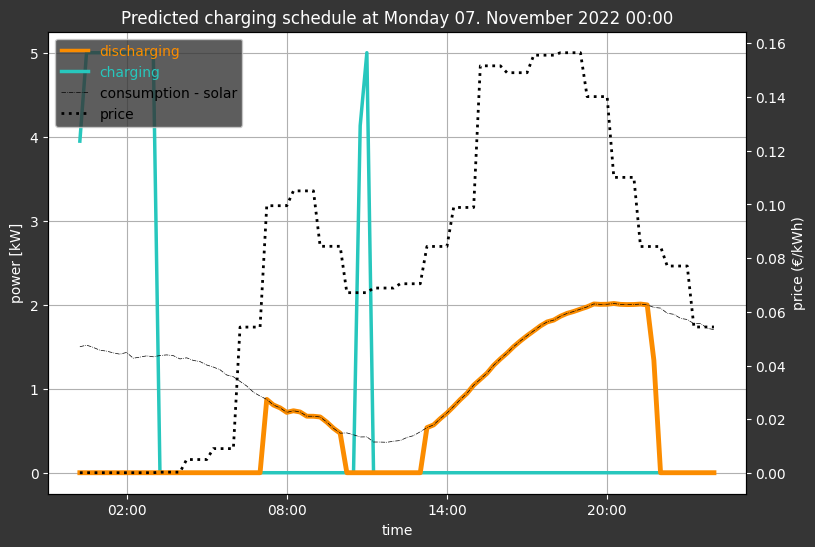

In [69]:
time = 11361-5*4 +34*24*4#10000

fig = plt.figure(facecolor='#353535',figsize=(9,6))
hours = mdates.HourLocator(interval = 6)
h_fmt = mdates.DateFormatter('%H:%M')
ax = plt.axes(facecolor='white')

#ax.set_frame_on(False)
ax.set_title(f'Predicted charging schedule at {df.Prediction_date.iloc[time].strftime("%A %d. %B %Y %H:%M")}')
ax.grid(True)
ax.tick_params(colors='white')  # Set the x-axis tick labels color to white
#solar_out = ax.plot(df.output_Timestamp.iloc[time],df.solar_output.iloc[time],c='#fb8c00',linewidth=2.5)
#solar_true = ax.plot(df.output_Timestamp.iloc[time],df.solar_true.iloc[time],linestyle='--',c='#fb8c00')
#consumption_out = ax.plot(df.output_Timestamp.iloc[time],df.consumption_output.iloc[time],c='#27c7bd',linewidth=2.5)
#consumption_true = ax.plot(df.output_Timestamp.iloc[time],df.consumption_true.iloc[time],linestyle='--',c='#27c7bd')
#demand_after_solar_true = ax.plot(df.output_Timestamp.iloc[time],df.demand_after_solar_true.iloc[time],linestyle='--',c='#000000')
#charging_out = ax.plot(df.output_Timestamp.iloc[time],df.charging_forecast.iloc[time],c='red',linewidth=2.5)
#discharging_out = ax.plot(df.output_Timestamp.iloc[time],df.discharging_forecast.iloc[time],linestyle='-',c='green',linewidth=2.5)
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')
ax.set_xlabel('time')
ax.set_ylabel('power [kW]')
prediction_charge = ax.plot(df.output_Timestamp.iloc[time],df.charging_forecast.iloc[time],linestyle='-',c='#27c7bd',linewidth=2.5)
prediction_discharge = ax.plot(df.output_Timestamp.iloc[time],df.discharging_forecast.iloc[time],c='#fb8c00',linewidth=3.5)
demand_after_solar_out = ax.plot(df.output_Timestamp.iloc[time],df.demand_after_solar_pred.iloc[time],c='#000000',linewidth=.5,linestyle='-.')
ax2 = ax.twinx()
ax2.set_ylabel('price (€/kWh)')
ax2.yaxis.label.set_color('white')
ax2.tick_params(colors='white')  # Set the x-axis tick labels color to white

price = ax2.plot(df.output_Timestamp.iloc[time],df.price_true.iloc[time],c='black',linewidth=2,linestyle='dotted')


legend = plt.legend((solar_out[0],consumption_out[0],demand_after_solar_out[0],price[0]),('discharging','charging','consumption - solar','price'),labelcolor='linecolor',loc='upper left')
legend.get_frame().set_facecolor('#353535')



In [31]:
price_current_list = [df.price_true.iloc[t][0] for t in range(df.shape[0])]

In [32]:
df['current_price'] = price_current_list

additional plot with 'charging_forecast','discharging_forecast','price_true'

bar chart ['optimal_charging_action','optimal_discharging_action']

battery plot wit 'soc'

In [81]:
df.iloc[1][13:15]

optimal_charging_action       0.0
optimal_discharging_action    0.0
Name: 2022-06-08 00:00:00, dtype: object

In [71]:
df.iloc[1][22][:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.4164    ,
       1.39843   , 1.37192   , 1.27965   , 1.25433   , 1.14014   ,
       1.02035   , 0.898795  , 0.845487  , 0.687524  , 0.534157  ,
       0.370027  , 0.23625   , 0.0653094 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00185424, 0.153319  ,
       0.326252  , 0.478024  , 0.638379  , 0.766634  , 0.88435

<BarContainer object of 2 artists>

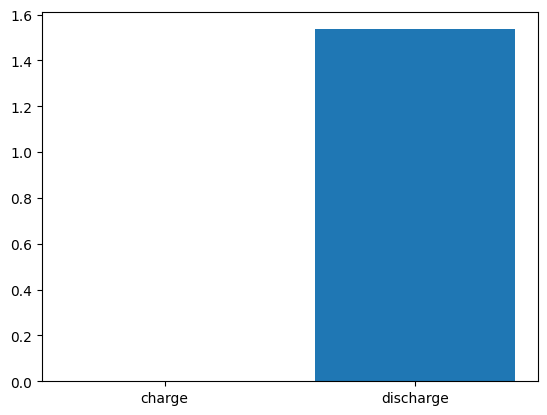

In [50]:
x=3350
plt.bar(['charge','discharge'],[df.iloc[x].loc['optimal_charging_action'],df.iloc[x].loc['optimal_discharging_action']])